## Code calculating the PINEM spectrograms as a function of g0 for different squeezed vacuums

In [11]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from math import sqrt, pi

from qutip import basis, plot_fock_distribution, displace, squeeze
from src.pinem_spectrum import pinemQ_coherent, pinemQ_coherent_squeezed,pinemQ

from src.generic import progressbar

font = {'family': 'Sans','color':  'black','weight': 'normal','size': 12}

Simulation inputs

In [ ]:
ene_photon=1.55 # Photon energy in eV
ZLP_width=0.5 # Energy standard deviation in eV
N_space = 100 # dimension of the Hilbert space

zeta1=0.5
zeta2=1.0

# Define energy axis
Emax=30
Emin=-Emax
ene_dim=1024
E=np.linspace(Emin,Emax,ene_dim)

# Ensemble of g0 value to compute - g0 is the electron-photon coupling constant
g_dim=100
g_set=np.linspace(0.01,1.5,g_dim)

In [14]:
spectrogram_squeezed1=np.zeros((ene_dim,g_dim))

# We first compute the photonic coefficient table for the cat state
maxit=50
nmax=30
ind_table=np.linspace(0,maxit+nmax+1,maxit+nmax+2)
alpha_table=ind_table*0.0*1j
ket_ref= squeeze(N_space, zeta1)*basis(N_space,0)
for i in range(np.size(ind_table)):
    ket=basis(N_space,i)
    alpha_table[i]=ket.overlap(ket_ref)

# Compute the spectrogram
for k in progressbar(range(g_dim),"g scan",40):
    spectrogram_squeezed1[:,k]=pinemQ(E,ene_photon,g_set[k],ZLP_width,alpha_table,maxit,nmax)

g scan[████████████████████████████████████████] 100/100 Est wait 00:00.00



In [15]:
spectrogram_squeezed2=np.zeros((ene_dim,g_dim))

# We first compute the photonic coefficient table for the cat state
maxit=50
nmax=30
ind_table=np.linspace(0,maxit+nmax+1,maxit+nmax+2)
alpha_table=ind_table*0.0*1j
ket_ref= squeeze(N_space, zeta2)*basis(N_space,0)
for i in range(np.size(ind_table)):
    ket=basis(N_space,i)
    alpha_table[i]=ket.overlap(ket_ref)

# Compute the spectrogram
for k in progressbar(range(g_dim),"g scan",40):
    spectrogram_squeezed2[:,k]=pinemQ(E,ene_photon,g_set[k],ZLP_width,alpha_table,maxit,nmax)

g scan[████████████████████████████████████████] 100/100 Est wait 00:00.00



Plot the spectrograms

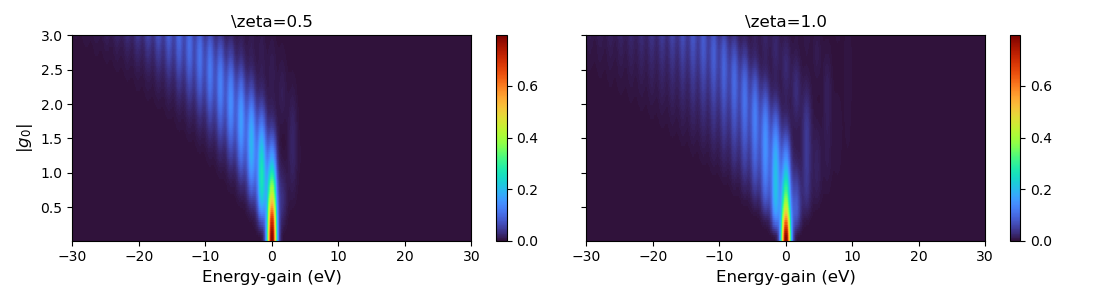

In [17]:
fig, axs = plt.subplots(1, 2,figsize=(11.0, 3.0))

ax = axs[0]
c1 = ax.imshow(np.transpose(spectrogram_squeezed1), cmap='turbo', vmin=np.min(spectrogram_squeezed1), vmax=np.max(spectrogram_squeezed1),
              extent=[E.min(), E.max(), g_set.min(), g_set.max()],
              interpolation='nearest', origin='lower', aspect='auto')
ax.set_title(r'\zeta=0.5', fontdict=font)
ax.set_xlabel("Energy-gain (eV)", fontdict=font)
ax.set_ylabel(r"$\vert g_0 \vert $", fontdict=font)
fig.colorbar(c1, ax=ax)

ax = axs[1]
c2 = ax.imshow(np.transpose(spectrogram_squeezed2), cmap='turbo', vmin=np.min(spectrogram_squeezed2), vmax=np.max(spectrogram_squeezed2),
              extent=[E.min(), E.max(), g_set.min(), g_set.max()],
              interpolation='nearest', origin='lower', aspect='auto')
ax.set_title(r'\zeta=1.0', fontdict=font)
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_xlabel("Energy-gain (eV)", fontdict=font)
fig.colorbar(c2, ax=ax)


fig.tight_layout()
plt.show()

filename='PINEM_squeezed_vacuum.png'
plt.savefig(filename,dpi=500,transparent=False)

Plot the corresponding initial photon statistics